<a href="https://colab.research.google.com/github/Geuens/curso_ai/blob/main/Cervezas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cervezas.csv")


In [4]:
df.head()

,id. cervecera,nombre cervecera,fecha encuesta,nota global,aroma,aspecto,encuestado,estilo,paladar,gusto,nombre,volument de alcohol,id. cerveza;;;;
0,1075,Caldera Brewing Company,1.210469e+09,4.0,4.0,4.5,Wasatch,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.5,25414;;;;
1,1075,Caldera Brewing Company,1.299617e+09,2.5,3.5,4.0,Thorpe429,American Pale Ale (APA),2.0,2.5,Caldera Pale Ale,5.5,25414;;;;
2,1075,Caldera Brewing Company,1.262623e+09,4.5,3.5,3.5,rfgetz,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.5,25414;;;;
3,1075,Caldera Brewing Company,1.281982e+09,4.0,4.0,4.0,Brent,American IPA,4.0,4.0,Caldera IPA,6.1,10784;;;;
4,1075,Caldera Brewing Company,1.280541e+09,5.0,4.0,4.5,JohnQVegas,American IPA,4.5,5.0,Caldera IPA,6.1,10784;;;;


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15866 entries, 0 to 15865
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id. cervecera        15866 non-null  object 
 1   nombre cervecera     15273 non-null  object 
 2   fecha encuesta       15273 non-null  float64
 3   nota global          15273 non-null  float64
 4   aroma                15273 non-null  float64
 5   aspecto              15273 non-null  float64
 6   encuestado           15271 non-null  object 
 7   estilo               15273 non-null  object 
 8   paladar              15273 non-null  float64
 9   gusto                15273 non-null  float64
 10  nombre               15273 non-null  object 
 11  volument de alcohol  14644 non-null  float64
 12  id. cerveza;;;;      15273 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.6+ MB


In [6]:
# Eliminar filas con valores faltantes
df_cleaned = df.dropna()

# Convertir variables categóricas en representaciones numéricas utilizando codificación one-hot
categorical_cols = ["id. cervecera", "nombre cervecera", "encuestado", "estilo", "nombre", "id. cerveza;;;;"]
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols)

# Escalar los datos
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [7]:
print(df.describe())

       fecha encuesta   nota global         aroma       aspecto       paladar  \
count    1.527300e+04  15273.000000  15273.000000  15273.000000  15273.000000   
mean     1.225787e+09      3.813822      3.733517      3.834545      3.741505   
std      7.645373e+07      0.719311      0.692931      0.617425      0.680057   
min      9.330336e+08      1.000000      1.000000      1.000000      1.000000   
25%      1.176250e+09      3.500000      3.500000      3.500000      3.500000   
50%      1.241302e+09      4.000000      4.000000      4.000000      4.000000   
75%      1.290399e+09      4.500000      4.000000      4.000000      4.000000   
max      1.326258e+09      5.000000      5.000000      5.000000      5.000000   

              gusto  volument de alcohol  
count  15273.000000         14644.000000  
mean       3.790022             7.040164  
std        0.728952             2.347019  
min        1.000000             0.450000  
25%        3.500000             5.200000  
50%        4

In [8]:
print(df['estilo'].unique())

['American Pale Ale (APA)' 'American IPA' 'English Bitter'
 'Belgian Strong Pale Ale' 'Light Lager' 'Euro Pale Lager' 'Bock' nan
 'American Amber / Red Lager' 'American Porter' 'Scotch Ale / Wee Heavy'
 'Scottish Ale' 'English Porter' 'Rye Beer' 'Oatmeal Stout'
 'Russian Imperial Stout' 'Euro Dark Lager' 'Munich Dunkel Lager'
 'Hefeweizen' 'American Double / Imperial IPA' 'English Barleywine'
 'Pumpkin Ale' 'Winter Warmer' 'Black & Tan' 'Märzen / Oktoberfest'
 'American Amber / Red Ale' 'Belgian Strong Dark Ale'
 'Fruit / Vegetable Beer' 'Extra Special / Strong Bitter (ESB)'
 'Irish Red Ale' 'Smoked Beer' 'American Malt Liquor' 'Belgian Dark Ale'
 'American Strong Ale' 'American Barleywine'
 'American Double / Imperial Stout' 'English Brown Ale'
 'American Wild Ale' 'American Stout' 'Dubbel' 'Witbier' 'Tripel'
 'Czech Pilsener' 'Irish Dry Stout' 'American Brown Ale'
 'English Strong Ale' 'English Stout' 'English India Pale Ale (IPA)'
 'Cream Ale' 'Doppelbock' 'American Adjunct Lager'
 

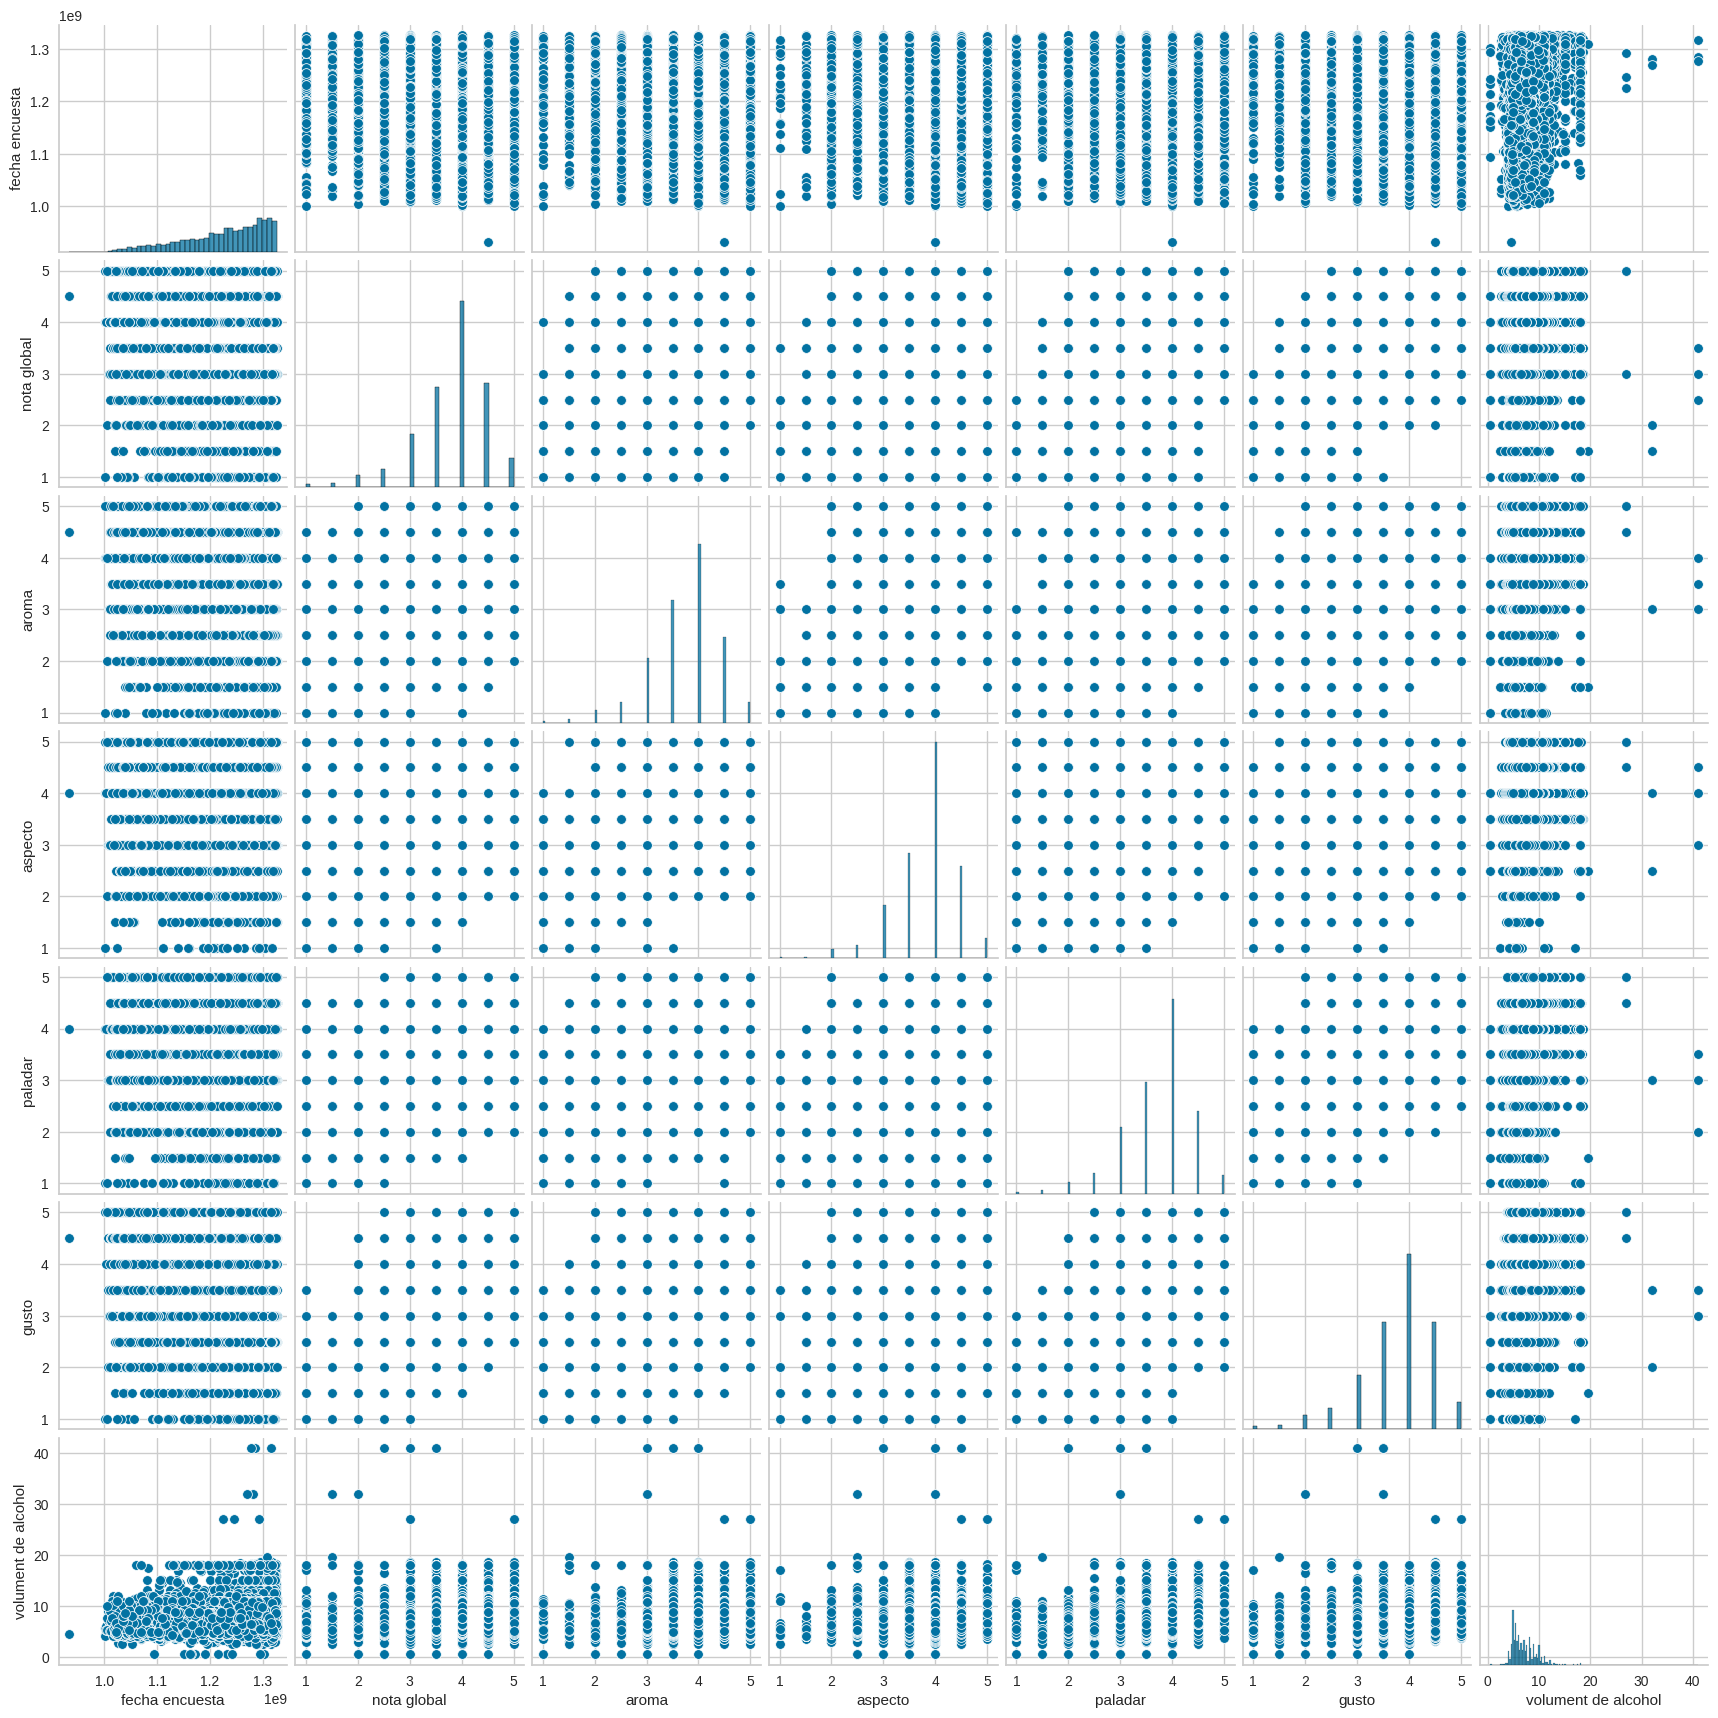

In [9]:
# Visualización de datos
sns.pairplot(df)  # Diagrama de dispersión para variables numéricas
plt.show()


<ipython-input-10-f0e80386e76b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


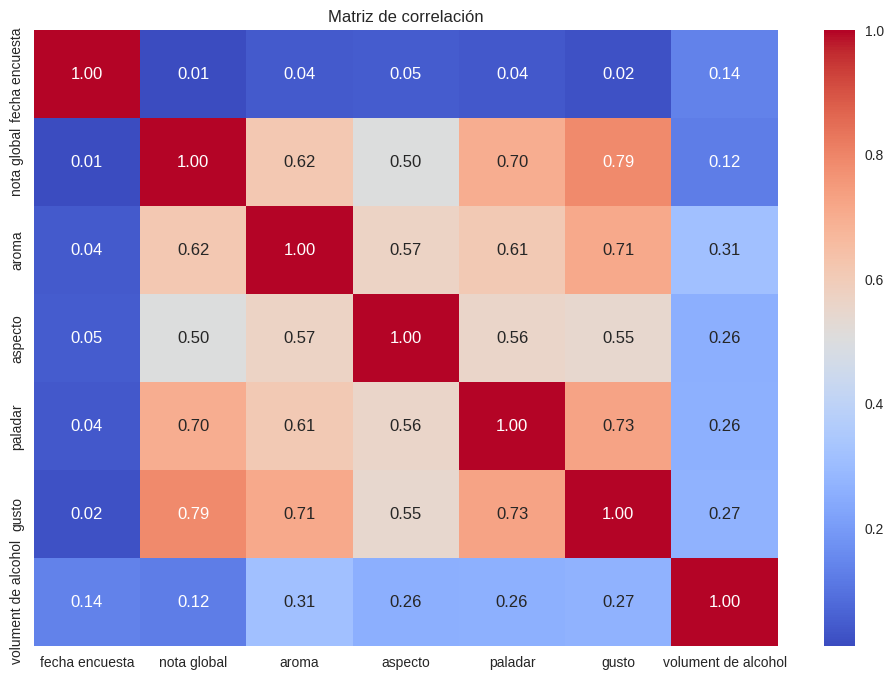

In [10]:
# Matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [11]:
print(correlation_matrix)

                     fecha encuesta  nota global     aroma   aspecto  \
fecha encuesta             1.000000     0.010244  0.043818  0.045102   
nota global                0.010244     1.000000  0.615733  0.501397   
aroma                      0.043818     0.615733  1.000000  0.568744   
aspecto                    0.045102     0.501397  0.568744  1.000000   
paladar                    0.040270     0.700438  0.612113  0.555875   
gusto                      0.024920     0.790380  0.712415  0.546028   
volument de alcohol        0.137517     0.123242  0.314045  0.257506   

                      paladar     gusto  volument de alcohol  
fecha encuesta       0.040270  0.024920             0.137517  
nota global          0.700438  0.790380             0.123242  
aroma                0.612113  0.712415             0.314045  
aspecto              0.555875  0.546028             0.257506  
paladar              1.000000  0.727073             0.258327  
gusto                0.727073  1.000000      

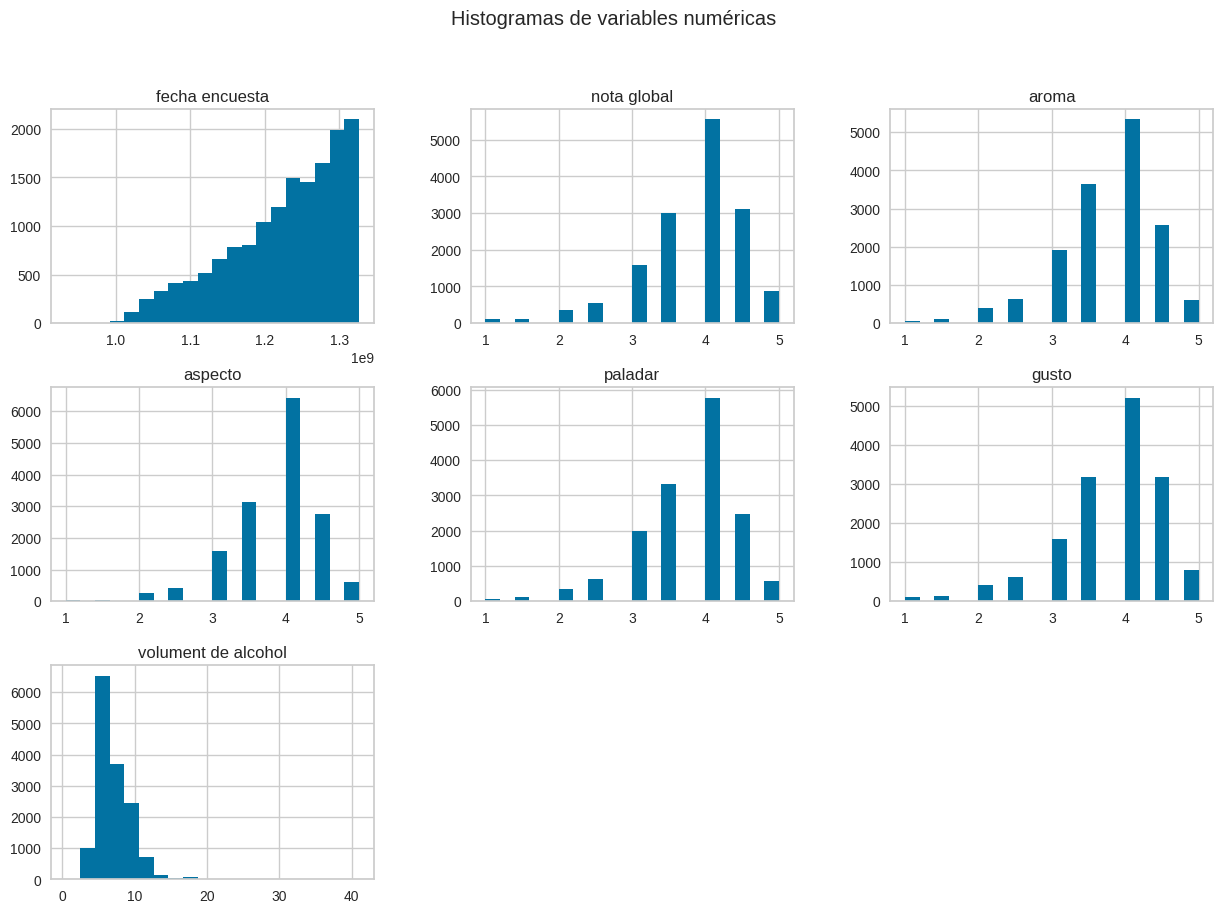

In [12]:
# Histograma de las variables numéricas
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogramas de variables numéricas")
plt.show()

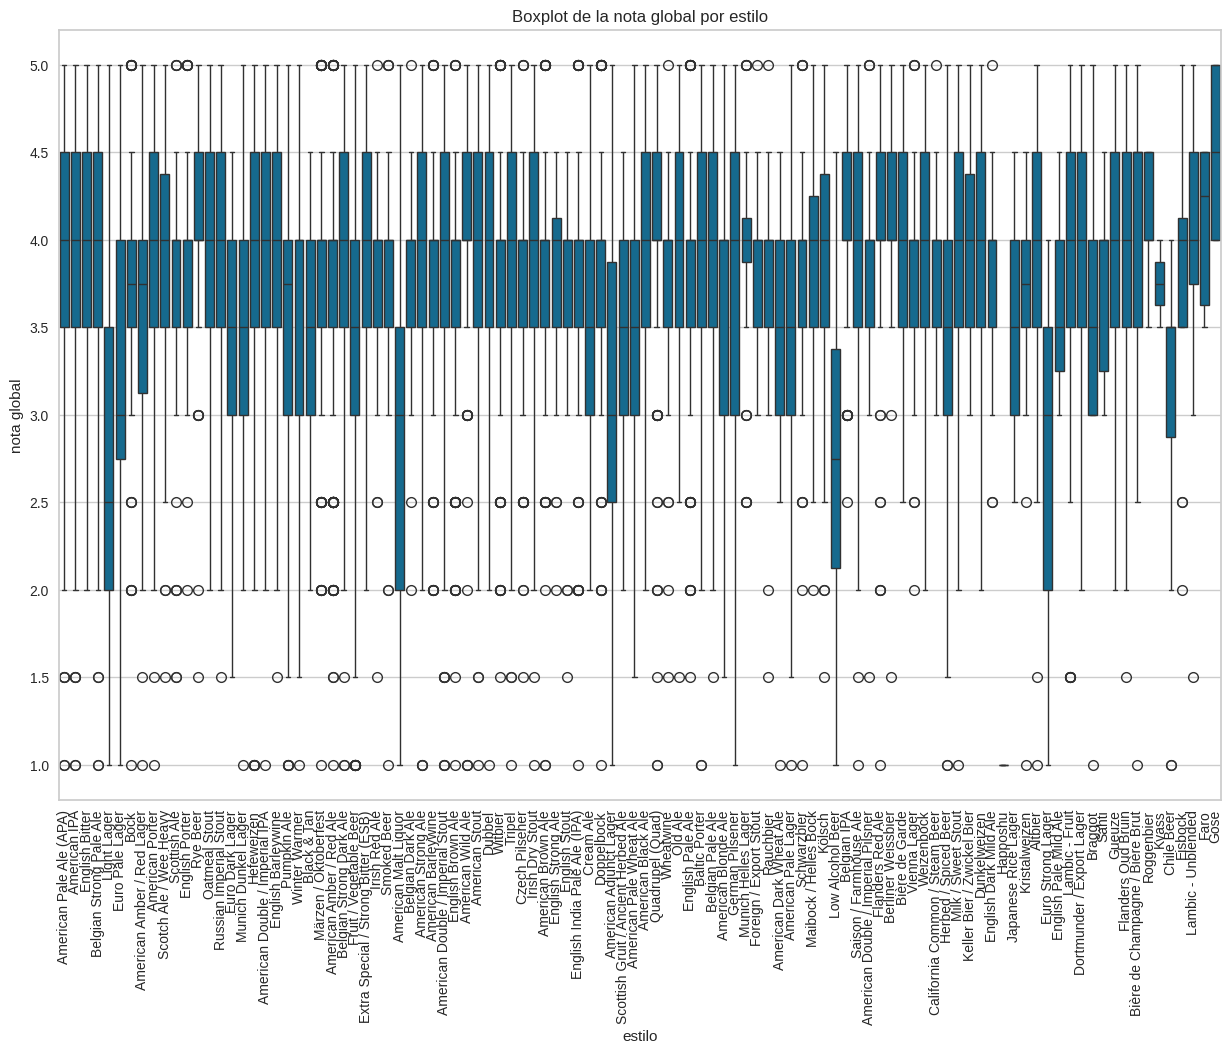

In [13]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='estilo', y='nota global')
plt.title("Boxplot de la nota global por estilo")
plt.xticks(rotation=90)
plt.show()

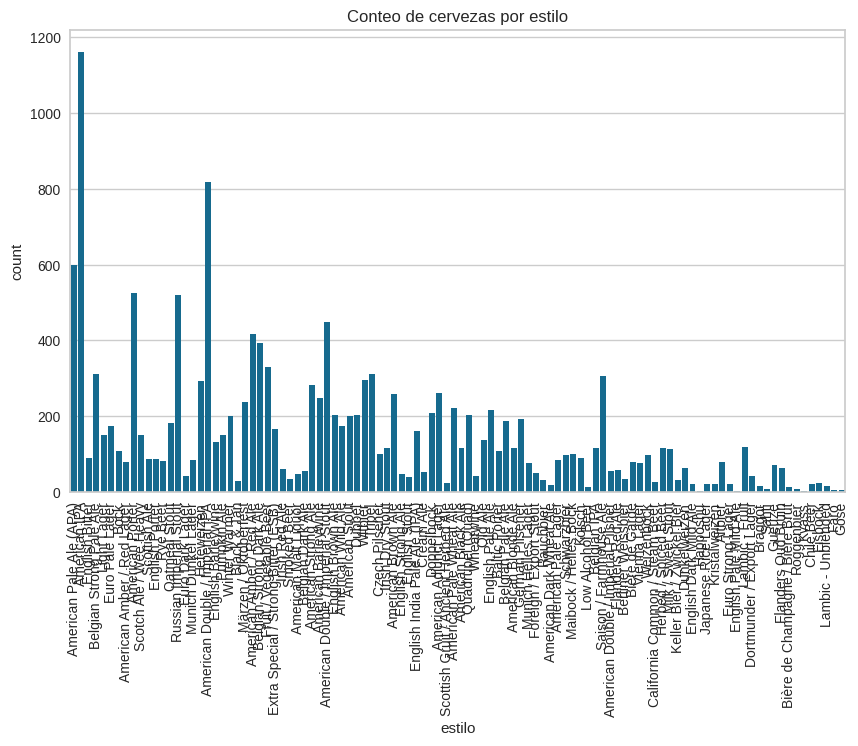

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='estilo')
plt.title("Conteo de cervezas por estilo")
plt.xticks(rotation=90)
plt.show()

In [25]:
# Definir un umbral de correlación
threshold = 0.5

# Seleccionar las columnas que tienen una correlación significativa con al menos una otra variable
columns_to_keep = set()
for column in correlation_matrix.columns:
    if column == "volument de alcohol":
        columns_to_keep.add(column)  # Mantener la columna "volumen de alcohol"
        continue  # Saltar al siguiente iteración
    correlated_columns = correlation_matrix.index[correlation_matrix[column] > threshold].tolist()
    correlated_columns.remove(column)  # Eliminar la propia columna
    columns_to_keep.update(correlated_columns)

# Convertir las columnas a eliminar a una lista
columns_to_remove = list(set(correlation_matrix.columns) - columns_to_keep)

# Eliminar las columnas no necesarias del DataFrame
df_scaled = df.drop(columns=columns_to_remove)

# Verificar el nuevo DataFrame
print(df_scaled.head())

  id. cervecera         nombre cervecera  nota global  aroma  aspecto  \
0          1075  Caldera Brewing Company          4.0    4.0      4.5   
1          1075  Caldera Brewing Company          2.5    3.5      4.0   
2          1075  Caldera Brewing Company          4.5    3.5      3.5   
3          1075  Caldera Brewing Company          4.0    4.0      4.0   
4          1075  Caldera Brewing Company          5.0    4.0      4.5   

   encuestado                   estilo  paladar  gusto            nombre  \
0     Wasatch  American Pale Ale (APA)      4.0    4.0  Caldera Pale Ale   
1   Thorpe429  American Pale Ale (APA)      2.0    2.5  Caldera Pale Ale   
2      rfgetz  American Pale Ale (APA)      4.0    4.0  Caldera Pale Ale   
3       Brent             American IPA      4.0    4.0       Caldera IPA   
4  JohnQVegas             American IPA      4.5    5.0       Caldera IPA   

   volument de alcohol id. cerveza;;;;  
0                  5.5       25414;;;;  
1                  5.5

In [26]:
#drop variables redundantes o no interesantes
df_scaled = df_scaled.drop(["encuestado", "nombre cervecera"], axis=1)


In [27]:
categorical_cols = ["id. cervecera", "estilo", "nombre", "id. cerveza;;;;"]
df_encoded = pd.get_dummies(df_scaled, columns=categorical_cols)
df_encoded = df_encoded.dropna()


In [28]:
df_encoded.head()

,nota global,aroma,aspecto,paladar,gusto,volument de alcohol,"id. cervecera_1,""Plzensky Prazdroj, a. s."",1033814571,4.5,4.0,4.5,aaronh,Czech Pilsener,4.0,4.0,Pilsner Urquell,4.4,429;;;;","id. cervecera_1,""Plzensky Prazdroj, a. s."",1092433034,4.5,3.5,3.5,Hibernator,Czech Pilsener,4.0,4.0,Pilsner Urquell,4.4,429;;;;","id. cervecera_1,""Plzensky Prazdroj, a. s."",1118602202,4.0,3.0,3.5,Wasatch,Czech Pilsener,3.5,3.0,Pilsner Urquell,4.4,429;;;;","id. cervecera_1,""Plzensky Prazdroj, a. s."",1125889212,3.0,2.0,3.0,BigBry,Czech Pilsener,3.0,3.5,Pilsner Urquell,4.4,429;;;;",...,id. cerveza;;;;_993;;;;,id. cerveza;;;;_9946;;;;,id. cerveza;;;;_994;;;;,id. cerveza;;;;_9951;;;;,id. cerveza;;;;_995;;;;,id. cerveza;;;;_996;;;;,id. cerveza;;;;_9981;;;;,id. cerveza;;;;_998;;;;,id. cerveza;;;;_99;;;;,id. cerveza;;;;_9;;;;
0,4.0,4.0,4.5,4.0,4.0,5.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.5,3.5,4.0,2.0,2.5,5.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.5,3.5,3.5,4.0,4.0,5.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,4.0,4.0,4.0,4.0,6.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,4.0,4.5,4.5,5.0,6.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Crear una instancia del modelo KMeans
model = KMeans()

# Crear el visualizador del codo
visualizer = KElbowVisualizer(model, k=(1,12))

# Entrenar el modelo con los datos
visualizer.fit(df_encoded)

# Mostrar el visualizador
visualizer.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Definir el número de clusters
n_clusters = 3  # Ajsutar el numero segun el numero de grados de cervezas que queremos por ejemplo k=3 (cervezas baratas, cerveas calidad medie, cervezas calidad superior)

In [19]:

# Crear el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Entrenar el modelo
kmeans.fit(df_encoded)

# Asignar las etiquetas de cluster a cada muestra
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
df_encoded.reset_index(drop=True, inplace=True)
df_encoded['cluster'] = labels

# Mostrar las primeras filas del DataFrame con las etiquetas de cluster asignadas
print(df_encoded.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   nota global  aroma  aspecto  paladar  gusto  \
0          4.0    4.0      4.5      4.0    4.0   
1          2.5    3.5      4.0      2.0    2.5   
2          4.5    3.5      3.5      4.0    4.0   
3          4.0    4.0      4.0      4.0    4.0   
4          5.0    4.0      4.5      4.5    5.0   

   id. cervecera_1,"Plzensky Prazdroj, a. s.",1033814571,4.5,4.0,4.5,aaronh,Czech Pilsener,4.0,4.0,Pilsner Urquell,4.4,429;;;;  \
0                                                  0                                                                             
1                                                  0                                                                             
2                                                  0                                                                             
3                                                  0                                                                             
4                                                

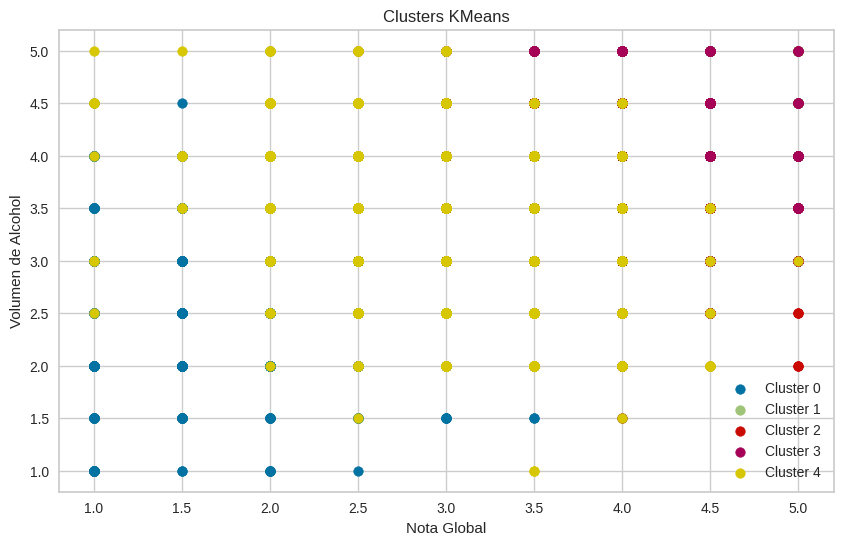

In [22]:
import matplotlib.pyplot as plt

# Extraer las características para visualización
X_visualization = df_encoded[['nota global', 'volument de alcohol']].values

# Visualizar los clusters en un gráfico de dispersión
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    plt.scatter(X_visualization[df_encoded['cluster'] == cluster_label, 0],
                X_visualization[df_encoded['cluster'] == cluster_label, 1],
                label=f'Cluster {cluster_label}')
plt.title('Clusters KMeans')
plt.xlabel('Nota Global')
plt.ylabel('Volumen de Alcohol')
plt.legend()
plt.show()


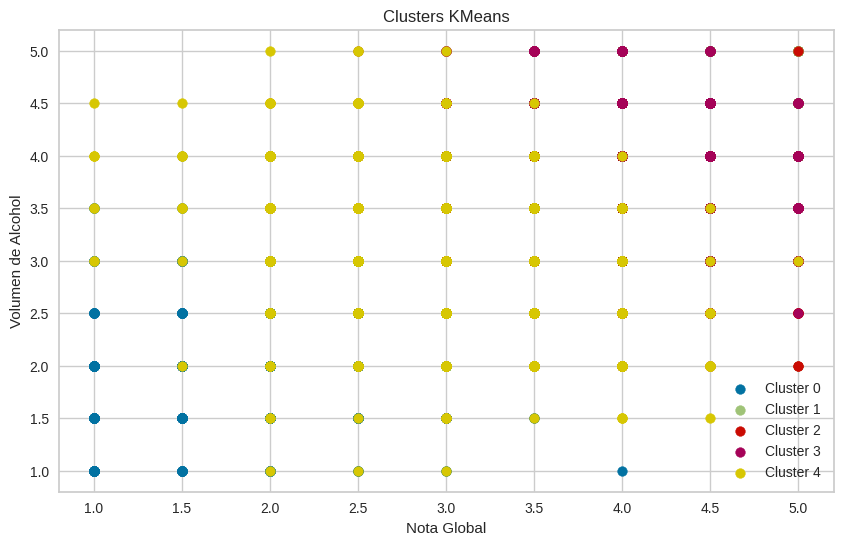

In [23]:
import matplotlib.pyplot as plt

# Extraer las características para visualización
X_visualization = df_encoded[['nota global', 'aroma']].values

# Visualizar los clusters en un gráfico de dispersión
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    plt.scatter(X_visualization[df_encoded['cluster'] == cluster_label, 0],
                X_visualization[df_encoded['cluster'] == cluster_label, 1],
                label=f'Cluster {cluster_label}')
plt.title('Clusters KMeans')
plt.xlabel('Nota Global')
plt.ylabel('Volumen de Alcohol')
plt.legend()
plt.show()

In [ ]:
# la idea es encontrar los distintos tipos de cervezas cuyo precio dependera de si pertencesn a un cluster u otro, dependiendo de su calidad